In [1]:
from GMM import *
    

c:\Users\Vaibhav\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
REALIMAGES=[[],[],[]]
# reading vectors from files
import os
for files in os.listdir('./Vectors/forest_needleleaf'):
    with open('./Vectors/forest_needleleaf/'+files, 'r') as f:
        for line in f:
            vectors = line.split(',')
            vectors = [float(i) for i in vectors]
            # print(vectors)
            REALIMAGES[0].append(vectors)
            
for files in os.listdir('./Vectors/ice_cream_parlor'):
    with open('./Vectors/ice_cream_parlor/'+files, 'r') as f:
        for line in f:
            vectors = line.split(',')
            vectors = [float(i) for i in vectors]
            # print(vectors)
            REALIMAGES[1].append(vectors)
            
for files in os.listdir('./Vectors/pond'):
    with open('./Vectors/pond/'+files, 'r') as f:
        for line in f:
            vectors = line.split(',')
            vectors = [float(i) for i in vectors]
            # print(vectors)
            REALIMAGES[2].append(vectors)
    

In [3]:
print(len(REALIMAGES[2]))

82440


In [4]:
print(len(REALIMAGES[0]))

22581


In [5]:
# convert each image to a 23 dimentional vector
REALIMAGES_BVW_Test=[[],[],[]]

import os
for files in os.listdir('./VectorsTest/forest_needleleaf'):
    with open('./VectorsTest/forest_needleleaf/'+files, 'r') as f:
        image=[]
        for line in f:
            vectors = line.split(',')
            vectors = [float(i) for i in vectors]
            image.append(vectors)
        REALIMAGES_BVW_Test[0].append(image)
            
for files in os.listdir('./VectorsTest/ice_cream_parlor'):
    with open('./VectorsTest/ice_cream_parlor/'+files, 'r') as f:
        image=[]
        for line in f:
            vectors = line.split(',')
            vectors = [float(i) for i in vectors]
            image.append(vectors)
        REALIMAGES_BVW_Test[1].append(image)
            
for files in os.listdir('./VectorsTest/pond'):
    with open('./VectorsTest/pond/'+files, 'r') as f:
        image=[]
        for line in f:
            vectors = line.split(',')
            vectors = [float(i) for i in vectors]
            image.append(vectors)
        REALIMAGES_BVW_Test[2].append(image)

In [6]:
from GMM import *
model = Bayes_Classifier_GMM(2)

In [9]:
likelihood=model.train(REALIMAGES,max_itr=1)

data (22581, 24)
gmm done
data (27581, 24)
gmm done
data (82440, 24)
gmm done


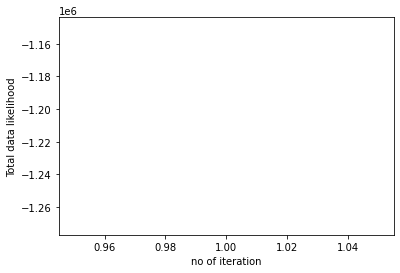

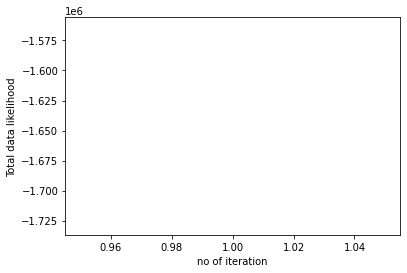

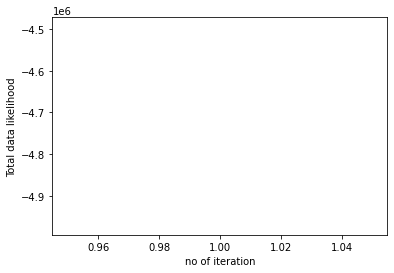

In [10]:
for l in likelihood:
    plt.plot([i for i in range(1,len(l)+1)],[L for L in l])
    plt.xlabel("no of iteration")
    plt.ylabel("Total data likelihood")
    plt.show()

In [11]:
print(REALIMAGES_BVW_Test[0][0][0])

[138.0, 208.0, 662.0, 16.0, 0.0, 0.0, 0.0, 0.0, 56.0, 187.0, 144.0, 455.0, 182.0, 0.0, 0.0, 0.0, 82.0, 114.0, 91.0, 94.0, 114.0, 355.0, 174.0, 0.0]


In [12]:
def predictVectors(self,vectors):
    max_probability=-100000000
    which_class=0
    for i in range(self.num_of_classes):
        AllVectorsProbability=1
        for vector in vectors:                
            probability=0
            for j in range(self.classes[i].num_of_clusters):
                if(np.linalg.det(self.classes[i].clusters[j].covariance)==0):
                    continue
                probability+=self.classes[i].clusters[j].weight*multivariate_normal_pdf(vector,self.classes[i].clusters[j].mean,self.classes[i].clusters[j].covariance,allow_singular=True)
            AllVectorsProbability+=np.log(probability)
        # print(AllVectorsProbability)
        # AllVectorsProbability = abs(AllVectorsProbability)
        if AllVectorsProbability>max_probability:
            max_probability=AllVectorsProbability
            which_class=i
        # print(max_probability)
    return which_class

In [13]:
def test(self,classes_test_data,predictVectors):
    confusion=confusion_matrix(np.zeros((self.num_of_classes,self.num_of_classes)))
    
    for i in range(len(classes_test_data)):
        for point in classes_test_data[i]:
            predicted = predictVectors(self,point)
            confusion.fill(i, predicted)
            print("Predicted class: ",predicted," Actual class: ",i)
    return confusion

In [14]:
print(predictVectors(model,REALIMAGES_BVW_Test[2][3]))

2


In [15]:
confusion = test(model,REALIMAGES_BVW_Test,predictVectors)

Predicted class:  0  Actual class:  0
Predicted class:  0  Actual class:  0
Predicted class:  2  Actual class:  0
Predicted class:  0  Actual class:  0
Predicted class:  0  Actual class:  0
Predicted class:  0  Actual class:  0
Predicted class:  0  Actual class:  0
Predicted class:  0  Actual class:  0
Predicted class:  0  Actual class:  0
Predicted class:  0  Actual class:  0
Predicted class:  0  Actual class:  0
Predicted class:  0  Actual class:  0
Predicted class:  2  Actual class:  0
Predicted class:  2  Actual class:  0
Predicted class:  0  Actual class:  0
Predicted class:  0  Actual class:  0
Predicted class:  0  Actual class:  0
Predicted class:  2  Actual class:  0
Predicted class:  0  Actual class:  0
Predicted class:  0  Actual class:  0
Predicted class:  0  Actual class:  0
Predicted class:  0  Actual class:  0
Predicted class:  0  Actual class:  0
Predicted class:  2  Actual class:  0
Predicted class:  2  Actual class:  0
Predicted class:  0  Actual class:  0
Predicted cl

C:\Users\Vaibhav\AppData\Local\Temp\ipykernel_3680\3413831072.py:12: RuntimeWarning: divide by zero encountered in log
  AllVectorsProbability+=np.log(probability)


Predicted class:  1  Actual class:  1
Predicted class:  1  Actual class:  1
Predicted class:  1  Actual class:  1
Predicted class:  1  Actual class:  1
Predicted class:  1  Actual class:  1
Predicted class:  1  Actual class:  1
Predicted class:  1  Actual class:  1
Predicted class:  1  Actual class:  1
Predicted class:  0  Actual class:  1
Predicted class:  1  Actual class:  1
Predicted class:  1  Actual class:  1
Predicted class:  1  Actual class:  1
Predicted class:  0  Actual class:  1
Predicted class:  1  Actual class:  1
Predicted class:  1  Actual class:  1
Predicted class:  1  Actual class:  1
Predicted class:  2  Actual class:  1
Predicted class:  1  Actual class:  1
Predicted class:  2  Actual class:  1
Predicted class:  1  Actual class:  1
Predicted class:  1  Actual class:  1
Predicted class:  1  Actual class:  1
Predicted class:  0  Actual class:  1
Predicted class:  1  Actual class:  1
Predicted class:  1  Actual class:  1
Predicted class:  1  Actual class:  1
Predicted cl

In [16]:
confusion.print()

confusion matrix: 
[[35.  3. 12.]
 [ 5. 42.  3.]
 [11.  2. 37.]]
accuracy:  0.76
precision:  [0.6862745098039216, 0.8936170212765957, 0.7115384615384616]
recall:  [0.7, 0.84, 0.74]
f1_score:  [0.693069306930693, 0.8659793814432989, 0.7254901960784313]
